In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import seaborn as sns
import numpy as np
#시계열은 시간의 흐름에 따라 데이터의 평균과 분산이 변하기 때문에 임의로 보간을 진행하면 문제가 발생한다.

In [5]:
pip install missingno

In [6]:
df = pd.read_csv('seattle-weather.csv')

In [7]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [8]:
type(df['date'][0]) #지금 날짜 데이터가 문자열로 정의되어 있다. 이러면 시계열 데이터의 특성을 이용한 보간을 진행할 수 없으니 시간 관련 인덱스를 새로 만들어준다.

str

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
import matplotlib.pyplot as plt


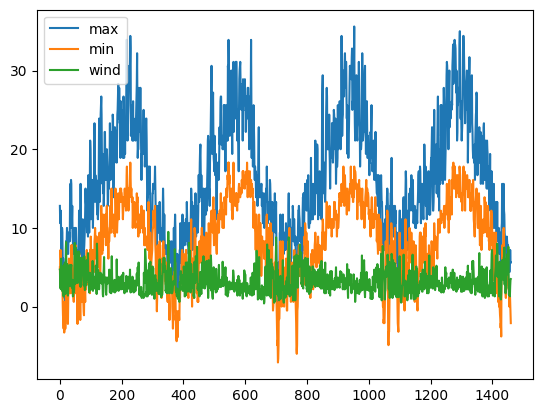

In [59]:
plt.plot(df['temp_max'],label='max')
plt.plot(df['temp_min'],label='min')

plt.plot(df['wind'],label='wind')
#plt.plot(df['precipitation'],label='prec')


plt.legend()
plt.show()

#기본적으로 기온의 최고와 최저는 함께 따라가는 경향, wind는 최고 최저기온이 낮아질 때 높아지는 것을 알 수 있다.

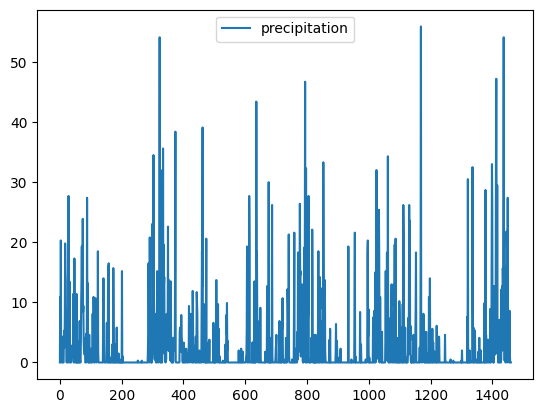

In [63]:
plt.plot(df['precipitation'],label = 'precipitation')
plt.legend()
plt.show()

#그에 비해 y값으로 설정된 precipitation은 온도가 낮아질 때 함께 높아지는 상관관계가 있긴 하지만, 데이터의 변동성이 너무 커
# 그 경향을 반영하여 보간이 수행될 지 의문이다.

In [13]:
df_x = df[['temp_max','temp_min', 'wind']]

In [14]:
df_x

,temp_max,temp_min,wind
0,12.8,5.0,4.7
1,10.6,2.8,4.5
2,11.7,7.2,2.3
3,12.2,5.6,4.7
4,8.9,2.8,6.1
...,...,...,...
1456,4.4,1.7,2.9
1457,5.0,1.7,1.3
1458,7.2,0.6,2.6
1459,5.6,-1.0,3.4


In [15]:
df_x.isna().sum() #기생성된 결측치는 없다

temp_max    0
temp_min    0
wind        0
dtype: int64

In [16]:
msv=np.random.randint(0,1400, size=50)

In [17]:
df_x.iloc[msv] = np.nan

<ipython-input-17-a5aff4e57167>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x.iloc[msv] = np.nan


In [18]:
df_x.isna().sum()

temp_max    50
temp_min    50
wind        50
dtype: int64

In [19]:
df_sp =pd.concat([df['date'],df_x ,df['precipitation']],axis=1) # 결측치 만들고 y값과 붙이기
df_sp.set_index('date', inplace=True)

In [20]:
df_sp1 = df_sp

In [21]:
df_sp

,temp_max,temp_min,wind,precipitation
date,,,,
2012-01-01,12.8,5.0,4.7,0.0
2012-01-02,10.6,2.8,4.5,10.9
2012-01-03,11.7,7.2,2.3,0.8
2012-01-04,12.2,5.6,4.7,20.3
2012-01-05,8.9,2.8,6.1,1.3
...,...,...,...,...
2015-12-27,4.4,1.7,2.9,8.6
2015-12-28,5.0,1.7,1.3,1.5
2015-12-29,7.2,0.6,2.6,0.0


In [22]:
df_sp.shape

(1461, 4)

In [23]:
df_sp1 = df_sp
df_sp2 = df_sp

In [24]:
print(1461*0.7) # 1022를 기준으로 train과  test set 분리, 이미 결측값은 랜덤하게 분포하므로 데이터를 섞을 필요 없음 (섞어서도 안됨)

1022.6999999999999


In [25]:
#선형 보간 수행

In [26]:
df_sp = df_sp.interpolate(method = 'time')


In [27]:
x_train = df_sp[['temp_max','temp_min','wind']].iloc[:1022]
x_test = df_sp[['temp_max','temp_min','wind']].iloc[1022:]
y_train = df_sp['precipitation'].iloc[:1022]
y_test = df_sp['precipitation'].iloc[1022:]

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 3)
(439, 3)
(1022,)
(439,)


In [29]:
print(x_train.isna().sum())
print(x_test.isna().sum())

temp_max    0
temp_min    0
wind        0
dtype: int64
temp_max    0
temp_min    0
wind        0
dtype: int64


In [30]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [31]:
fit_train1 = sm.OLS(y_train, x_train)

In [32]:
fit_train1 = fit_train1.fit()

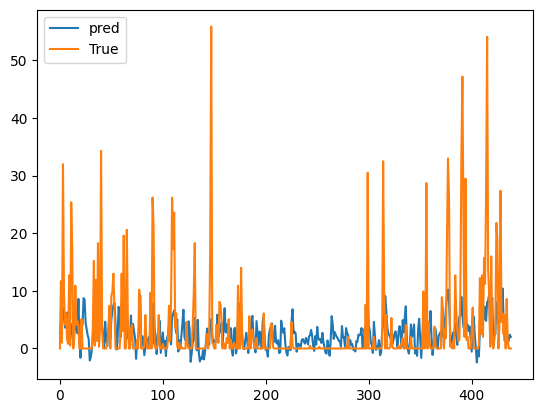

In [33]:
plt.plot(np.array(fit_train1.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse1)
#time을 기준으로 보간법을 수행하였더니 mse가 47.06정도로 나왔다. -> 그렇다면 iterative imputer를 사용했을 땐?

47.066185944034494


In [35]:
imputer = IterativeImputer(imputation_order = 'descending',
                          max_iter=10, random_state=111,
                          n_nearest_features=4)

df_sp1 =imputer.fit_transform(df_sp1)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [37]:
# 반환값이 array로 만들어진다.
df_sp1

array([[12.8,  5. ,  4.7,  0. ],
       [10.6,  2.8,  4.5, 10.9],
       [11.7,  7.2,  2.3,  0.8],
       ...,
       [ 7.2,  0.6,  2.6,  0. ],
       [ 5.6, -1. ,  3.4,  0. ],
       [ 5.6, -2.1,  3.5,  0. ]])

In [38]:
df_sp1= pd.DataFrame(df_sp1)

In [39]:
df_sp1.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [40]:
df_sp.columns

Index(['temp_max', 'temp_min', 'wind', 'precipitation'], dtype='object')

In [41]:
df_sp1.columns = ['temp_max', 'temp_min', 'wind', 'precipitation']

In [42]:
df_sp1

,temp_max,temp_min,wind,precipitation
0,12.8,5.0,4.7,0.0
1,10.6,2.8,4.5,10.9
2,11.7,7.2,2.3,0.8
3,12.2,5.6,4.7,20.3
4,8.9,2.8,6.1,1.3
...,...,...,...,...
1456,4.4,1.7,2.9,8.6
1457,5.0,1.7,1.3,1.5
1458,7.2,0.6,2.6,0.0
1459,5.6,-1.0,3.4,0.0


In [43]:
x_train1 = df_sp1[['temp_max','temp_min','wind']].iloc[:1022]
x_test1 = df_sp1[['temp_max','temp_min','wind']].iloc[1022:]
y_train1 = df_sp1['precipitation'].iloc[:1022]
y_test1 = df_sp1['precipitation'].iloc[1022:]

In [44]:
fit_train4 = sm.OLS(y_train1, x_train1)
fit_train4 = fit_train4.fit()

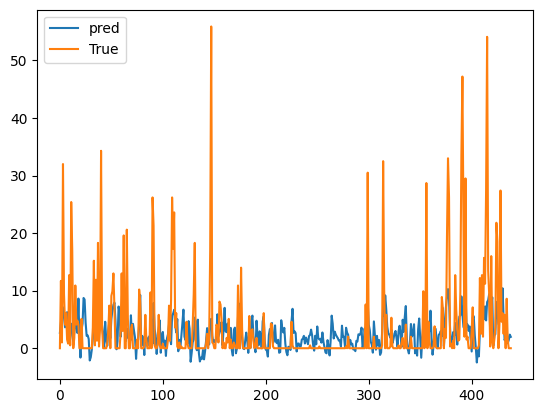

In [45]:
# iterative imputer
plt.plot(np.array(fit_train4.predict(x_test1)),label='pred')
plt.plot(np.array(y_test1), label='True')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_true = y_test1, y_pred = fit_train4.predict(x_test1))
print(mse3)

#오히려 mse가 줄어든 결과가 나왔다.

46.60033593653374


In [ ]:
#결과적으로 위의 그래프에서 pred값이 실제 true에서 국소적으로 형성되는 peak를 감지하지 못하기 때문에 mse가 줄어들지 않는 것이라 예상했다.

In [48]:
#시계열을 이용하지 말고 단순 선형 보간을 수행해보자

In [49]:
df_sp2 = df_sp2.interpolate(method = 'slinear')


In [50]:
x_train = df_sp2[['temp_max','temp_min','wind']].iloc[:1022]
x_test = df_sp2[['temp_max','temp_min','wind']].iloc[1022:]
y_train = df_sp2['precipitation'].iloc[:1022]
y_test = df_sp2['precipitation'].iloc[1022:]

In [51]:
fit_train5 = sm.OLS(y_train, x_train)

In [52]:
fit_train5 = fit_train5.fit()

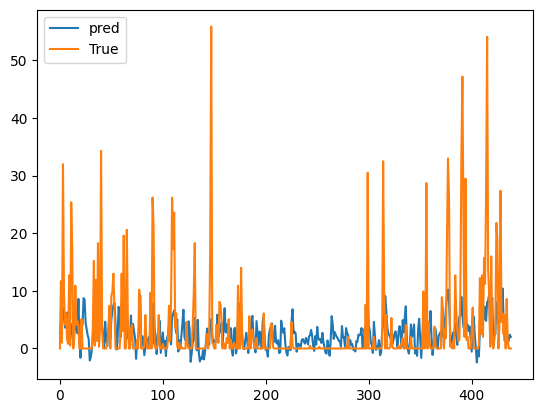

In [53]:
plt.plot(np.array(fit_train5.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error
mse5 = mean_squared_error(y_true = y_test, y_pred = fit_train5.predict(x_test))
print(mse5)
#성능이 그리 좋아지진 않는다.

47.066185944034494


In [56]:
print("{}: interpolate(time), {}: iterative imputer, {}: interpolate(slinear)".format(mse1,mse3,mse5))

47.066185944034494: interpolate(time), 46.60033593653374: iterative imputer, 47.066185944034494: interpolate(slinear)


In [63]:
#결국 시계열 데이터라 함은 데이터의 순서가 주어진 것이므로 그것에 맞는 보간법을 사용했을 때 (time, slinear, etc) 좋은 결과가 나와야 한다.
#헌데 이렇게 변동성이 큰 데이터를 보간해야 하는 경우엔 좋은 성능을 내지는 않는 듯 하다.
#추가적으로 내가 진행한 보간에서 이론적인 결함이 존재하는지, 보완할 부분은 있는지 지속적으로 살펴보아야 겠다.